refrence video ==> https://youtu.be/09_LlHjoEiY?si=GgJIJ0S3352gEpcX&t=16625

In [35]:
import math
%run graphstructures.ipynb
%run customheap.ipynb

semi_matrix representing graph




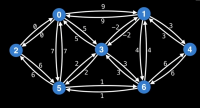

In [36]:
number_of_nodes = 7
semi_matrix = [[-1,9,0,5,-1,7,-1],
               [9,-1,-1,-2,3,-1,4],
               [0,-1,-1,-1,-1,6,-1],
               [5,-2,-1,-1,-1,2,3],
               [-1,3,-1,-1,-1,-1,6],
               [7,-1,6,2,-1,-1,1],
               [4,-1,-1,3,6,1,-1]]

to create a visited list with length of total nodes (here total of 7)

In [37]:
def create_visited():
    visited = [False] * number_of_nodes
    visited[0] = True
    return visited 

creating a dictionary with key length of total nodes (here total of 8), we use this to store our new minimum spanning tree

In [38]:
def create_mst_dict():
    mst = {}
    for i in range(0,number_of_nodes):
        mst[i] = []
    return mst

this method tracks the best and most promissing nodes in lazy_prim method, after the most promissing node pops from proirity queue, saves it in mst ditionary, count total saved promissing nodes in node_counter variable and tracks total cost of mst

In [39]:
def re_create_path(origin,to,weight):
    global node_counter
    global path_cost
    mst[origin].append(to)
    node_counter += 1
    path_cost += weight 

get all edges of the graph

In [40]:
def calculate_all_edges():
    edge = 0
    for row in semi_matrix:
        for node in row:
            if(node != -1):
                edge += 1
    return edge

path_cost: saves total cost of mst tree|,, node_counter: saves total moves on nodes on graph (when the next most promissing node pops)|,, visited: to track so we dont see any node twice|,, ipq: to create a min indexed dheap |,, mst: a distionary to store our new mst tree|,, edges: using this to determine how many childeren every node should have in dheap|,,

In [41]:
path_cost = 0
node_counter = 1
visited = create_visited()
mst = create_mst_dict()
edges = calculate_all_edges()
degree = math.ceil(edges / number_of_nodes)
ipq = MinIndexedDHeap(degree)

lazy_prim algorithm starts at node 0 searches all 0 neghbourings adding them to heap then pulling the most promissing one and search all its negbourings then adding them to heap this goes on until we have a mst which means we have seen all most promissing edges on count of number of nodes - 1 in other words we have seen enough promissing edge to create a mst
in the eager vertion we add,edit(update) and pop from heap
in this one we dont add duplicate edges we update them if we have a better cost to them from other nodes

In [42]:
def eager_prim():
    ipq.insert(node(0,0,0))
    while(ipq.show_length() != 0 and node_counter != number_of_nodes):
        item = ipq.remove()
        if(visited[item.to] == False):
            re_create_path(item.origin,item.to,item.weight)
        visited[item.to] = True
        for index,weight in enumerate(semi_matrix[item.to]):
            if(weight == -1):continue
            if(visited[index] == True):continue
            prev_item = ipq.does_exist(node(weight,index))
            if(prev_item != -1):
                if(prev_item.weight > weight):
                    ipq.update(index,weight,item.to)
            else:
                ipq.insert(node(weight,index,item.to))

In [43]:
eager_prim()
print(mst)
print(f"with cost of : {path_cost}")

{0: [2, 3], 1: [4], 2: [], 3: [1, 5], 4: [], 5: [6], 6: []}
with cost of : 9


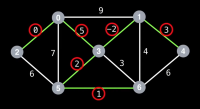